## Homework 4: Duality

Name: Zihao Qiu  
Campus ID: 9079810942  
Email: zqiu34@wisc.edu 

## Problem 1 (The chess problem)

### (a)

Assume that we produce xs small sets and xl large sets. The priaml LP problem can be described as follows:

$$
\begin{align}
\mathop {\max }\limits_{xs,xl} \quad 5xs+8xl \\
subject\ to: 3xs+2xl \leq 160 \\
             xs+4xl \leq 200 \\
             xs \geq 0 \\
             xl \geq 0
\end{align}
$$

In [2]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, xs >= 0)
@variable(m, xl >= 0)

@constraint(m, 3xs + 2xl <= 160)
@constraint(m, xs + 4xl <= 200)

@objective(m, Max, 5xs + 8xl)

@time status = solve(m)

println(status)
println("small set: ", getvalue(xs))
println("large set: ", getvalue(xl))
println("objective value: ", getobjectivevalue(m))

  8.185321 seconds (1.42 M allocations: 74.028 MiB, 0.33% gc time)
Optimal
small set: 24.0
large set: 44.0
objective value: 472.0


The plot of this LP problem is as follows(I use python3 and matplotlib to draw the image):

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.gcf()
ax = fig.gca()

plt.fill([0, 0, 24, 160/3, 0], [0, 50, 44, 0,0], color="lightgreen", label="feasible set")

xs = np.linspace(0, 60, 100)
xl = (472 - 5*xs) / 8
plt.plot(xs, xl, "b", label="max profit")

plt.plot([24], [44], 'ro', label="optimal point")

plt.xlabel('xs',fontsize=18)
plt.ylabel('xl',fontsize=18)

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

![avatar](http://chuantu.biz/t6/232/1519073903x-1566684628.png)

You can see the feasible set and the optimal point(24,44) from the image.

### (b)

The dual LP problem:

$$
\begin{align}
\mathop {\min }\limits_{\lambda1,\lambda2} \quad 200\lambda1+160\lambda2 \\
subject\ to: \lambda1+3\lambda2 \geq 5 \\
             4\lambda1+2\lambda2 \geq 8 \\
             \lambda1 \geq 0 \\
             \lambda2 \geq 0
\end{align}
$$

In [5]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, lambda1 >= 0)
@variable(m, lambda2 >= 0)

@constraint(m, lambda1 + 3lambda2 >= 5)
@constraint(m, 4lambda1 + 2lambda2 >= 8)

@objective(m, Min, 200lambda1 + 160lambda2)

@time status = solve(m)

println(status)
println("lambda1: ", getvalue(lambda1))
println("lambda2: ", getvalue(lambda2))
println("objective value: ", getobjectivevalue(m))

  0.000778 seconds (70 allocations: 4.797 KiB)
Optimal
lambda1: 1.4000000000000001
lambda2: 1.1999999999999997
objective value: 471.99999999999994


![avatar](http://chuantu.biz/t6/232/1519076572x-1566684628.png)

The optimal point is (1.4, 1.2) and the optimal object is 472.

## Problem 2 (Stigler's supplement)

### (a)

Data:

In [1]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("C:\\Users\\Administrator\\Desktop\\cs524\\HW4\\stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)
 
# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict(zip(nutrients,raw[2,n_nutrients]))

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray(raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients"));

Primal problem

In [2]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, x[1:length(n_foods)] >= 0)

@constraint(m, sum(x[i] * data[i,1] for i in 1:length(n_foods)) >= lower["Calories (1000)"])
@constraint(m, sum(x[i] * data[i,2] for i in 1:length(n_foods)) >= lower["Protein (g)"])
@constraint(m, sum(x[i] * data[i,3] for i in 1:length(n_foods)) >= lower["Calcium (g)"])
@constraint(m, sum(x[i] * data[i,4] for i in 1:length(n_foods)) >= lower["Iron (mg)"])
@constraint(m, sum(x[i] * data[i,5] for i in 1:length(n_foods)) >= lower["Vitamin A (1000 IU)"])
@constraint(m, sum(x[i] * data[i,6] for i in 1:length(n_foods)) >= lower["Thiamine (mg)"])
@constraint(m, sum(x[i] * data[i,7] for i in 1:length(n_foods)) >= lower["Riboflavin (mg)"])
@constraint(m, sum(x[i] * data[i,8] for i in 1:length(n_foods)) >= lower["Niacin (mg)"])
@constraint(m, sum(x[i] * data[i,9] for i in 1:length(n_foods)) >= lower["Ascorbic Acid (mg)"])

@objective(m, Min, sum(x[i] for i=1:length(n_foods)))
    
@time status = solve(m)

println(status)

for i in 1:length(n_foods)
    println(foods[i], ' ',getvalue(x[i]))
end
println("total value (one yaer): ", getobjectivevalue(m)*365)
println("objective value (one day): ", getobjectivevalue(m))

  4.709489 seconds (1.38 M allocations: 71.957 MiB, 0.69% gc time)
Optimal
Wheat Flour (Enriched) 0.02951906167648827
Macaroni 0.0
Wheat Cereal (Enriched) 0.0
Corn Flakes 0.0
Corn Meal 0.0
Hominy Grits 0.0
Rice 0.0
Rolled Oats 0.0
White Bread (Enriched) 0.0
Whole Wheat Bread 0.0
Rye Bread 0.0
Pound Cake 0.0
Soda Crackers 0.0
Milk 0.0
Evaporated Milk (can) 0.0
Butter 0.0
Oleomargarine 0.0
Eggs 0.0
Cheese (Cheddar) 0.0
Cream 0.0
Peanut Butter 0.0
Mayonnaise 0.0
Crisco 0.0
Lard 0.0
Sirloin Steak 0.0
Round Steak 0.0
Rib Roast 0.0
Chuck Roast 0.0
Plate 0.0
Liver (Beef) 0.0018925572907052643
Leg of Lamb 0.0
Lamb Chops (Rib) 0.0
Pork Chops 0.0
Pork Loin Roast 0.0
Bacon 0.0
Ham, smoked 0.0
Salt Pork 0.0
Roasting Chicken 0.0
Veal Cutlets 0.0
Salmon, Pink (can) 0.0
Apples 0.0
Bananas 0.0
Lemons 0.0
Oranges 0.0
Green Beans 0.0
Cabbage 0.011214435246144865
Carrots 0.0
Celery 0.0
Lettuce 0.0
Onions 0.0
Potatoes 0.0
Spinach 0.005007660466725203
Sweet Potatoes 0.0
Peaches (can) 0.0
Pears (can) 0.0
Pi

Dual problem

In [3]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, x[1:length(n_nutrients)] >= 0)

for i in 1:length(n_foods)
    @constraint(m, sum(x[j] * data[i,j] for j in 1:length(n_nutrients)) <= 1)
end

@objective(m, Max, sum(x[i] * lower[nutrients[i]] for i=1:length(n_nutrients)))
    
@time status = solve(m)

println(status)

for i in 1:length(n_nutrients)
    println(nutrients[i], ' ',getvalue(x[i]))
end 
println("objective value: ", getobjectivevalue(m))

  0.056879 seconds (70 allocations: 44.813 KiB)
Optimal
Calories (1000) 0.008765147298049485
Protein (g) 0.0
Calcium (g) 0.03173771344563715
Iron (mg) 0.0
Vitamin A (1000 IU) 0.00040023272172538176
Thiamine (mg) 0.0
Riboflavin (mg) 0.016358032699276687
Niacin (mg) 0.0
Ascorbic Acid (mg) 0.00014411751545899702
objective value: 0.10866227820675692


Shadow price of Calcium: \$0.03173771344563715 / g

In [20]:
0.03173771344563715 * 0.5

0.015868856722818576

So the price for per pill is \$0.015868856722818576

### (b)

Add an item to stigler.csv: "Calcium pill,0,0,50,0,0,0,0,0,0". 1 dollar can buy 100 pills, which contain 50g of calcium.

In [21]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("C:\\Users\\Administrator\\Desktop\\cs524\\HW4\\stigler_sup.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)
 
# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict(zip(nutrients,raw[2,n_nutrients]))

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray(raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients"));

In [23]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, x[1:length(n_foods)] >= 0)

@constraint(m, sum(x[i] * data[i,1] for i in 1:length(n_foods)) >= lower["Calories (1000)"])
@constraint(m, sum(x[i] * data[i,2] for i in 1:length(n_foods)) >= lower["Protein (g)"])
@constraint(m, sum(x[i] * data[i,3] for i in 1:length(n_foods)) >= lower["Calcium (g)"])
@constraint(m, sum(x[i] * data[i,4] for i in 1:length(n_foods)) >= lower["Iron (mg)"])
@constraint(m, sum(x[i] * data[i,5] for i in 1:length(n_foods)) >= lower["Vitamin A (1000 IU)"])
@constraint(m, sum(x[i] * data[i,6] for i in 1:length(n_foods)) >= lower["Thiamine (mg)"])
@constraint(m, sum(x[i] * data[i,7] for i in 1:length(n_foods)) >= lower["Riboflavin (mg)"])
@constraint(m, sum(x[i] * data[i,8] for i in 1:length(n_foods)) >= lower["Niacin (mg)"])
@constraint(m, sum(x[i] * data[i,9] for i in 1:length(n_foods)) >= lower["Ascorbic Acid (mg)"])

@objective(m, Min, sum(x[i] for i=1:length(n_foods)))
    
@time status = solve(m)

println(status)

for i in 1:length(n_foods)
    println(foods[i], ' ',getvalue(x[i]))
end
println("total value (one yaer): ", getobjectivevalue(m)*365)
println("objective value (one day): ", getobjectivevalue(m))

  0.000925 seconds (70 allocations: 48.813 KiB)
Optimal
Wheat Flour (Enriched) 0.06598060307911847
Macaroni 0.0
Wheat Cereal (Enriched) 0.0
Corn Flakes 0.0
Corn Meal 0.0
Hominy Grits 0.0
Rice 0.0
Rolled Oats 0.0
White Bread (Enriched) 0.0
Whole Wheat Bread 0.0
Rye Bread 0.0
Pound Cake 0.0
Soda Crackers 0.0
Milk 0.0
Evaporated Milk (can) 0.0
Butter 0.0
Oleomargarine 0.0
Eggs 0.0
Cheese (Cheddar) 0.0
Cream 0.0
Peanut Butter 0.0
Mayonnaise 0.0
Crisco 0.0
Lard 0.0
Sirloin Steak 0.0
Round Steak 0.0
Rib Roast 0.0
Chuck Roast 0.0
Plate 0.0
Liver (Beef) 0.00784433892120114
Leg of Lamb 0.0
Lamb Chops (Rib) 0.0
Pork Chops 0.0
Pork Loin Roast 0.0
Bacon 0.0
Ham, smoked 0.0
Salt Pork 0.0
Roasting Chicken 0.0
Veal Cutlets 0.0
Salmon, Pink (can) 0.0
Apples 0.0
Bananas 0.0
Lemons 0.0
Oranges 0.0
Green Beans 0.0
Cabbage 0.011195027632464827
Carrots 0.0
Celery 0.0
Lettuce 0.0
Onions 0.0
Potatoes 0.0
Spinach 0.003911295356684479
Sweet Potatoes 0.0
Peaches (can) 0.0
Pears (can) 0.0
Pineapple (can) 0.0
Asp

So we can see that my new optimal diet cantains 'Wheat Flour (Enriched)', 'Liver (Beef)', 'Cabbage', 'Spinach' and 'Calcium pill'.  
It can svae about \$2.66 one year compared to the original optimal diet.

## Problem 3 (Dual interpretation)

### (a)

The code of this LP problem:

In [58]:
using JuMP, Clp

obj = Float64[]

for t in (0:200)/100
    
    m = Model(solver = ClpSolver())

    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)

    @constraint(m, p - r == cospi(t))
    @constraint(m, q - s == sinpi(t))

    @objective(m, Min, p + q + r + s)

    status = solve(m)

    # println(status)
    # println("p: ", getvalue(p))
    # println("q: ", getvalue(q))
    # println("r: ", getvalue(r))
    # println("s: ", getvalue(s))
    # println("objective value: ", getobjectivevalue(m))
    push!(obj, getobjectivevalue(m))
end


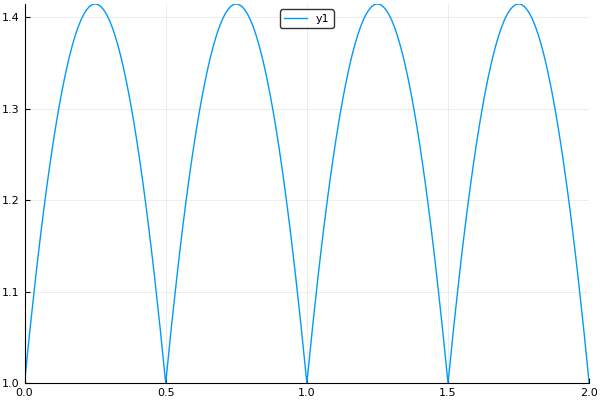

In [59]:
using Plots
plot((0:200)/100, obj)


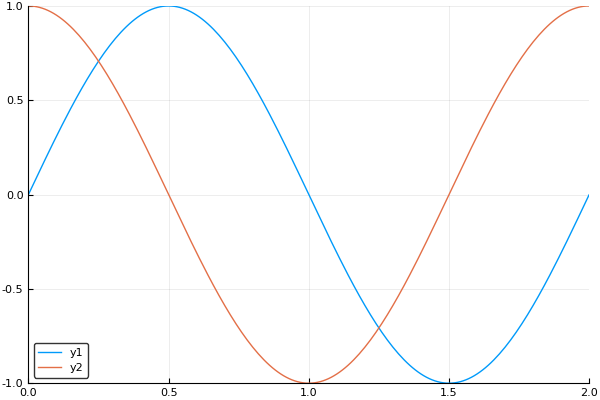

In [60]:
using Plots
x = (0:200)/100
sin_x = sinpi.(x)
cos_x = cospi.(x)
plot(x, sin_x)
plot!(x, cos_x)

When cos(t) > 0 and sin(t) > 0, then we have $0 < t < \frac{\pi}{2}$.  
Because $r \geq 0$ and $s \geq 0$, we have $p \geq 0$ and $q \geq 0$.  
To minimize p+q+r+s, we can let r=s=0. Then the objective value is p+q=sin(t)+cos(t)=$\sqrt{2}sin(t+\frac{\pi}{4})$ and $0 < t < \frac{\pi}{2}$.  
The graph of this function is:


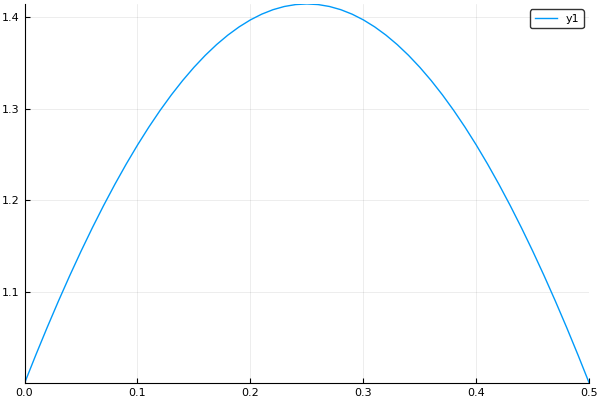

In [61]:
using Plots
x = (0:50)/100
y = sqrt(2) * sinpi.(x + 1/4)
plot(x, y)

This is exactly the first $\frac{1}{4}$ part of the initial graph.

When cos(t) < 0 and sin(t) > 0, then we have $\frac{\pi}{2} < t < \pi$.
To minimize p+q+r+s, we can let s=0, q=sin(t); let r=-cos(t), p=0. Then the objective value is r+q=sin(t)-cos(t)=$\sqrt{2}sin(t-\frac{\pi}{4})$ and $\frac{\pi}{2} < t < \pi$.  
The graph of this function is:


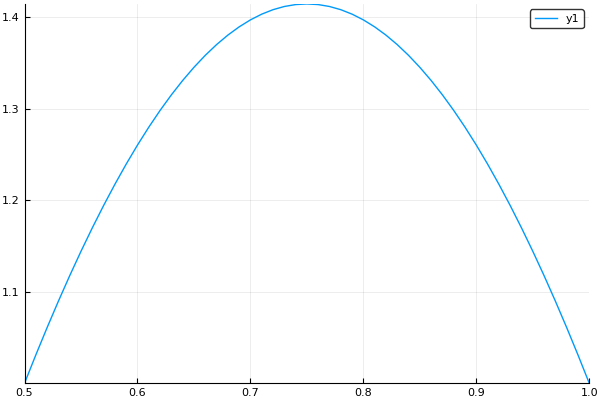

In [63]:
using Plots
x = (50:100)/100
y = sqrt(2) * sinpi.(x - 1/4)
plot(x, y)

This is exactly the second $\frac{1}{4}$ part of the initial graph.

When cos(t) < 0 and sin(t) < 0, then we have $\pi < t < \frac{3\pi}{2}$.
To minimize p+q+r+s, we can let s=-sin(t), q=0; let r=-cos(t), p=0. Then the objective value is s+r=-sin(t)-cos(t)=-$\sqrt{2}sin(t+\frac{\pi}{4})$ and $\pi < t < \frac{3\pi}{2}$.  
The graph of this function is:


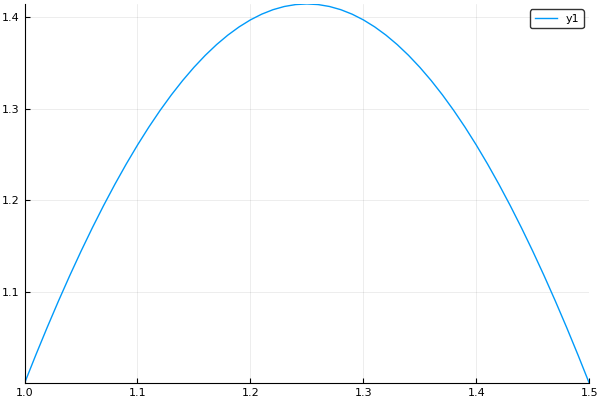

In [64]:
using Plots
x = (100:150)/100
y = - sqrt(2) * sinpi.(x + 1/4)
plot(x, y)

This is exactly the third $\frac{1}{4}$ part of the initial graph.

When cos(t) > 0 and sin(t) < 0, then we have $\frac{3\pi}{2} < t < 2\pi$.
To minimize p+q+r+s, we can let s=-sin(t), q=0; let r=0, p=cos(t). Then the objective value is s+p=-sin(t)+cos(t)=-$\sqrt{2}sin(t-\frac{\pi}{4})$ and $\frac{3\pi}{2} < t < 2\pi$.  
The graph of this function is:


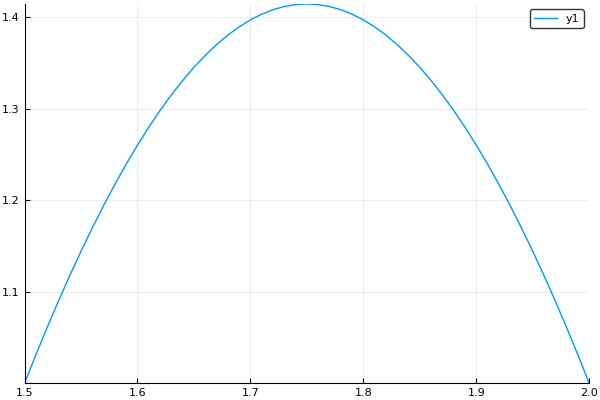

In [65]:
using Plots
x = (150:200)/100
y = - sqrt(2) * sinpi.(x - 1/4)
plot(x, y)

This is exactly the last $\frac{1}{4}$ part of the initial graph.

### (b)

The dual LP problem:

$$
\begin{align}
\mathop {\max }\limits_{l1,l2} \quad cos(t)l1+sin(t)l2 \\
subject\ to:   \left[
               \begin{matrix}
                 1 & 0\\
                 0 & 1\\
                 -1& 0\\
                 0 & -1
               \end{matrix} 
               \right]
               \left[
               \begin{matrix}
                 l1 \\
                 l2
               \end{matrix} 
               \right] \leq
                \left[
               \begin{matrix}
                 1 \\
                 1 \\
                 1 \\
                 1
               \end{matrix} 
               \right]
\end{align}
$$

And the code is as follows:

In [76]:
using JuMP, Clp

obj_dual = Float64[]

for t in (0:200)/100
    
    m = Model(solver = ClpSolver())

    @variable(m, l1)
    @variable(m, l2)

    @constraint(m, l1 <= 1)
    @constraint(m, l2 <= 1)
    @constraint(m, -l1 <= 1)
    @constraint(m, -l2 <= 1)

    @objective(m, Max, cospi(t) * l1 + sinpi(t) * l2)

    status = solve(m)

    # println(status)
    # println("l1: ", getvalue(l1))
    # println("l2: ", getvalue(l2))
    # println("objective value: ", getobjectivevalue(m))
    push!(obj_dual, getobjectivevalue(m))
end


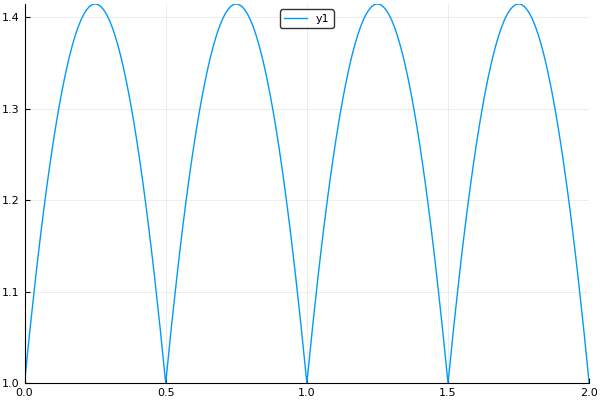

In [78]:
using Plots
plot((0:200)/100, obj_dual)

This solution agrees with the solution found in (a)